In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0} 

In [ ]:
data = np.load('cluster_data.npy') 

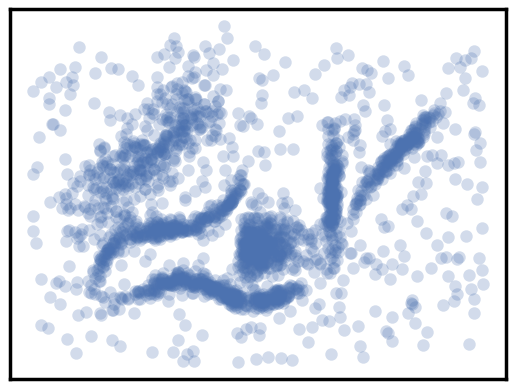

In [ ]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [ ]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [ ]:
# standardizing the data
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data 
pd.DataFrame(data_scaled).describe()

0             1
count  2.309000e+03  2.309000e+03
mean   9.847279e-17  1.230910e-16
std    1.000217e+00  1.000217e+00
min   -2.169966e+00 -2.258824e+00
25%   -7.770094e-01 -7.918323e-01
50%   -1.864709e-02 -1.747228e-01
75%    8.388193e-01  7.684391e-01
max    2.491428e+00  2.894518e+00

# ***KMeans*** 

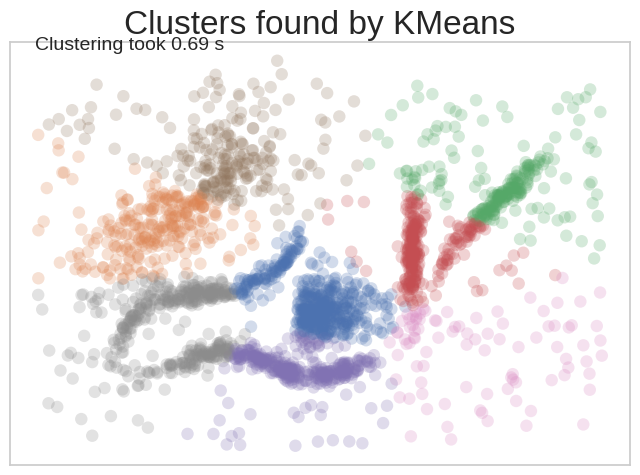

In [161]:
plot_clusters(data, cluster.KMeans, (), {'init':'k-means++', 'max_iter':300, 'tol':0.0001, 'random_state':None, 'copy_x':True, 'algorithm':'elkan'})

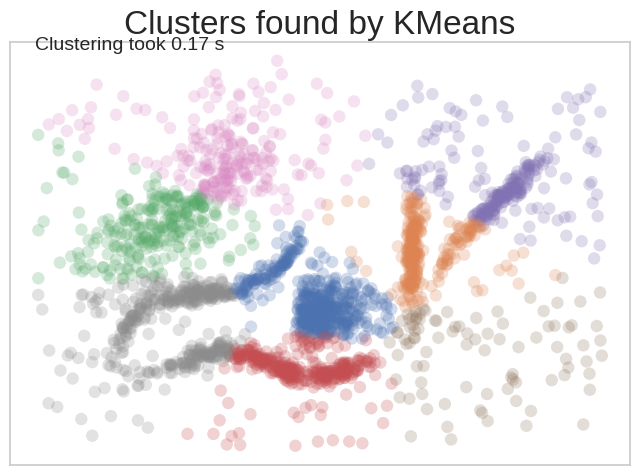

In [162]:
plot_clusters(data, cluster.KMeans, (), {'init':'k-means++', 'max_iter':300, 'tol':0.0001, 'random_state':None, 'copy_x':True, 'algorithm':'lloyd'})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


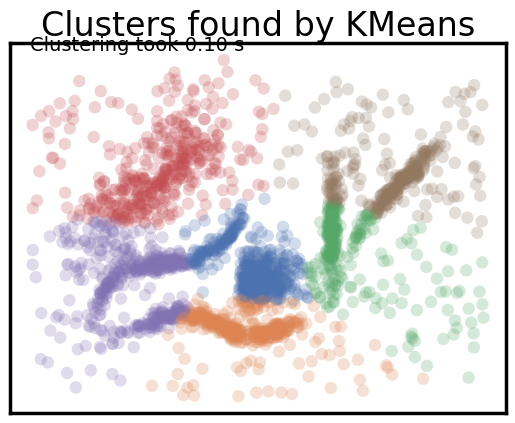

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

In [ ]:
# defining the kmeans function with initialization as k-means++
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, init='k-means++')
# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

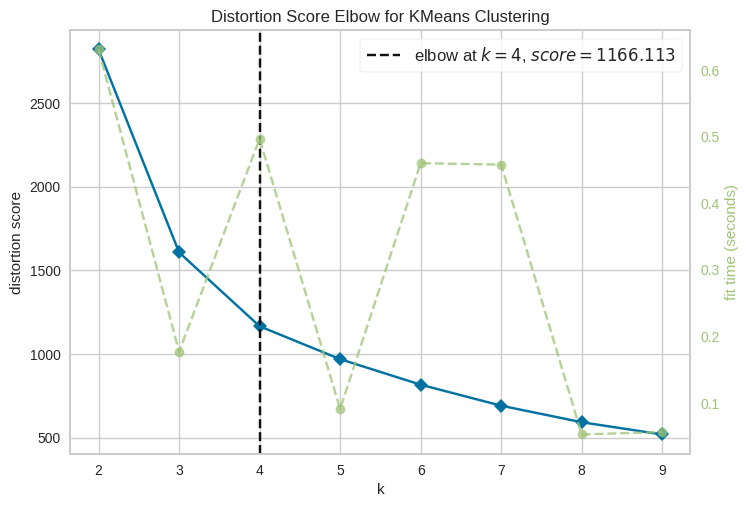

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(data_scaled)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


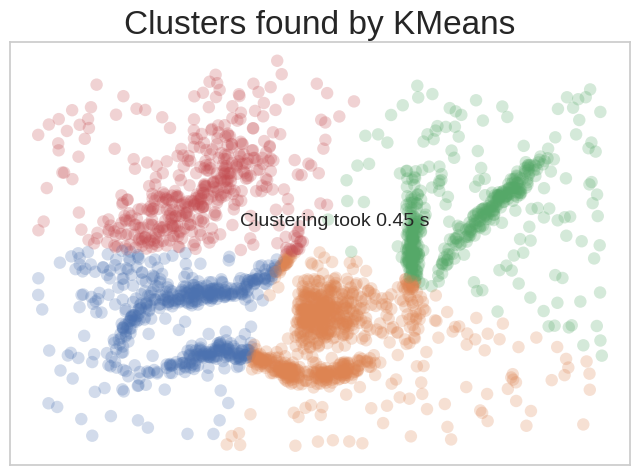

In [ ]:
plot_clusters(data_scaled, cluster.KMeans, (), {'n_clusters':4})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


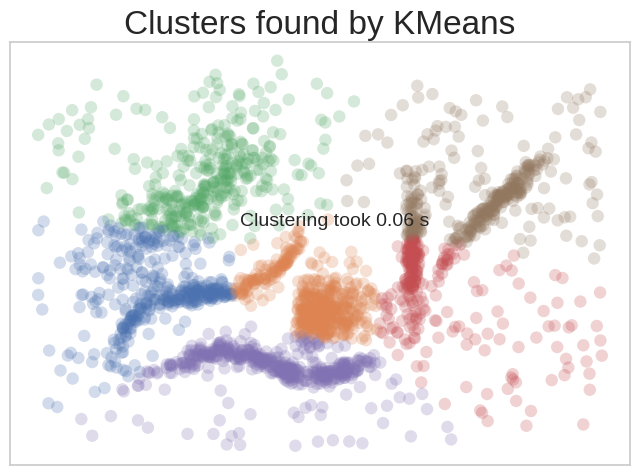

In [ ]:
plot_clusters(data_scaled, cluster.KMeans, (), {'n_clusters':6})

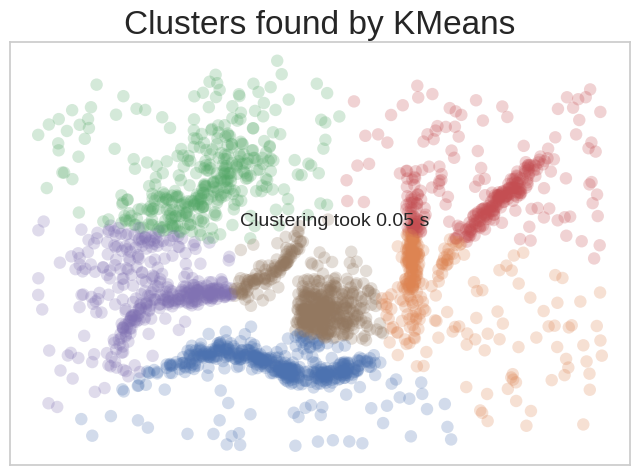

In [ ]:
plot_clusters(data_scaled, cluster.KMeans, (), {'n_clusters':6,'init':'k-means++', 'n_init':'warn', 'max_iter':300,'algorithm':'lloyd'})

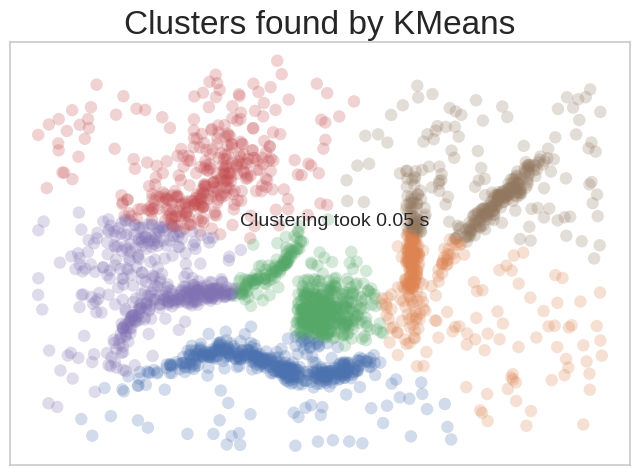

In [ ]:
plot_clusters(data_scaled, cluster.KMeans, (), {'n_clusters':6,'init':'k-means++', 'max_iter':500, 'tol':0.0001, 'verbose':0, 'random_state':None, 'copy_x':True, 'algorithm':'lloyd'})

# ***Affinity Propagation*** 

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import pandas as pd

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Af

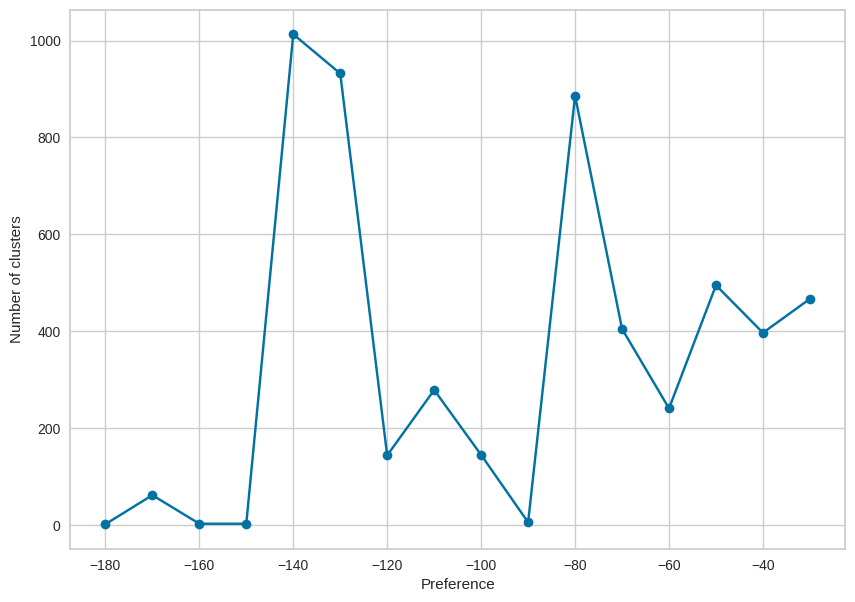

In [ ]:
preferences = np.arange(-30,-190,-10)
clusters = []

for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(data_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')

In [ ]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(data_scaled)
    plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


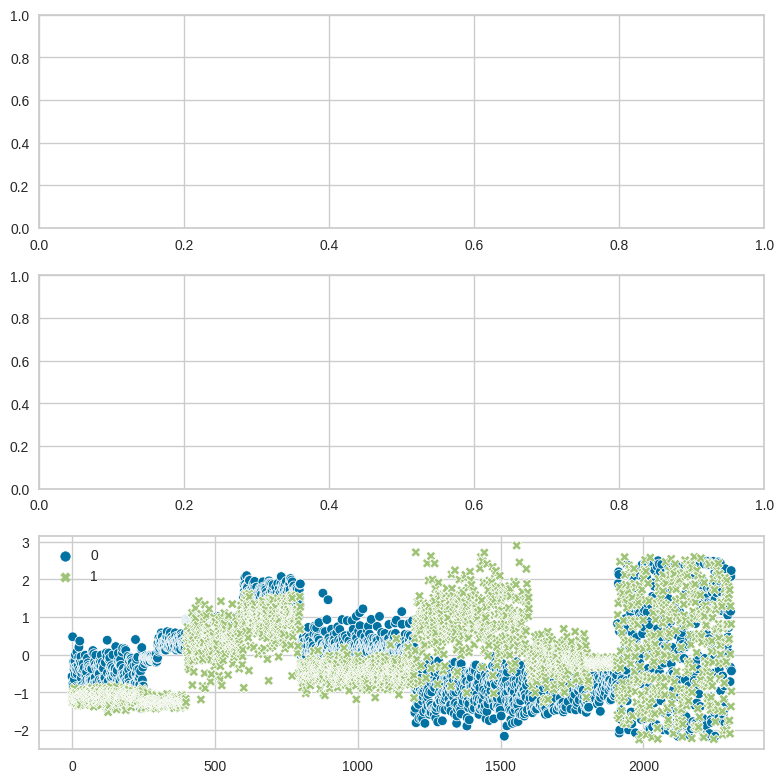

In [ ]:
af = AffinityPropagation(preference=-5, damping=0.6, verbose=False).fit(data)
labels_af = pd.DataFrame(af.labels_)
n_clusters_ = len(af.cluster_centers_indices_)

df = pd.DataFrame(data)
data_s = df.assign(Cluster=labels_af)
scatters(data_s,'Cluster')
grouped_af = data_s.groupby(['Cluster']).mean().round(1)

In [168]:
from sklearn.cluster import AffinityPropagation
# Fit Affinity Propagation with Scikit
max_iter=250
damping=0.5
preference=-5
afprop = AffinityPropagation(max_iter=250,damping=0.5,preference=-5)
afprop.fit(data)

cluster_centers_ = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_)

labels = afprop.labels_
cluster_centers = afprop.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of Estimated Clusters : %d" % n_clusters_ )
print("max_iter : %d" % max_iter)
print("damping : %d" % damping)
print("preference : %d" % preference)
print(labels)
# Predict the cluster for all the samples
#P = afprop.predict(data)

Number of Estimated Clusters : 2257
max_iter : 250
damping : 0
preference : -5
[   0    1    2 ... 2109 2255 2256]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


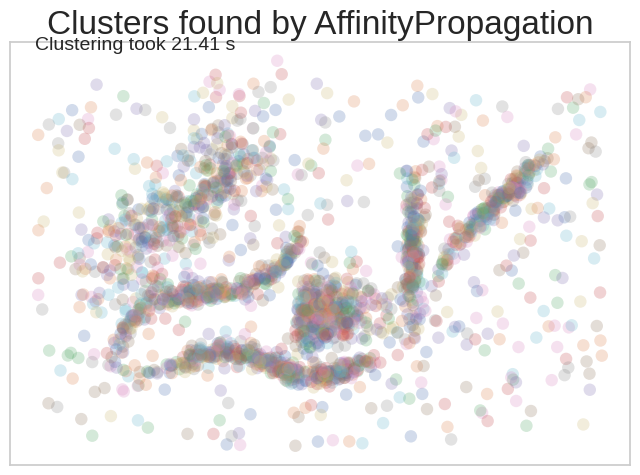

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'damping':0.5, 'preference':-5})

In [171]:
from sklearn.cluster import AffinityPropagation
max_iter=250
damping=0.7
preference=-5
afprop = AffinityPropagation(max_iter=250,damping=0.7,preference=-5)
afprop.fit(data)
cluster_centers_ = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_)

labels = afprop.labels_
cluster_centers = afprop.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of Estimated Clusters : %d" % n_clusters_ )
print("max_iter : %d" % max_iter)
print("damping : %d" % damping)
print("preference : %d" % preference)
print(labels)

#P = afprop.predict(data)

Number of Estimated Clusters : 349
max_iter : 250
damping : 0
preference : -5
[  7   7  48 ... 348  52  23]


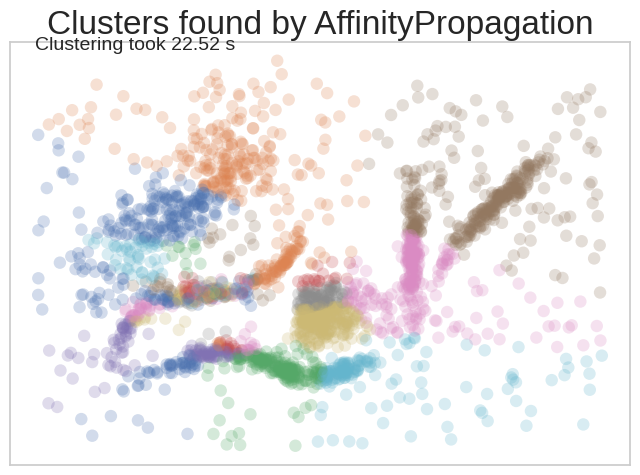

In [170]:
plot_clusters(data, cluster.AffinityPropagation, (), {'damping':0.7, 'preference':-5})

In [ ]:
from sklearn.cluster import AffinityPropagation

# Fit Affinity Propagation with Scikit
max_iter=250
damping=0.85
preference=-5
afprop = AffinityPropagation(max_iter=250,damping=0.85,preference=-5)
afprop.fit(data)

cluster_centers_ = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_)

labels = afprop.labels_
cluster_centers = afprop.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of Estimated Clusters : %d" % n_clusters_ )
print("max_iter : %d" % max_iter)
print("damping : %d" % damping)
print("preference : %d" % preference)

print(labels)

# Predict the cluster for all the samples
P = afprop.predict(data)

Number of Estimated Clusters : 9
max_iter : 250
damping : 0
preference : -5
[0 4 0 ... 8 2 0]


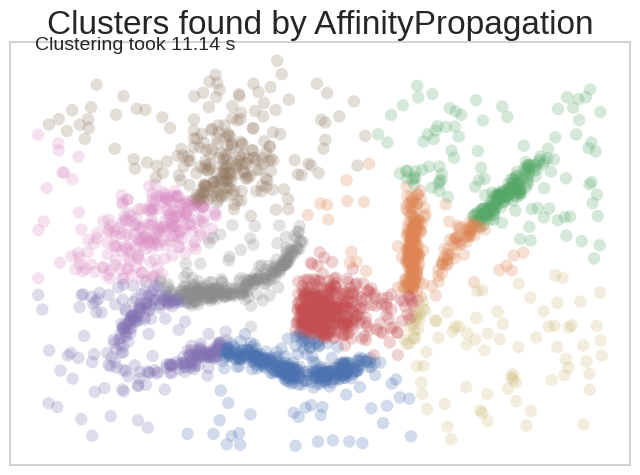

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'damping':0.85, 'preference':-5})

In [163]:
from sklearn.cluster import AffinityPropagation

# Fit Affinity Propagation with Scikit
max_iter=250
damping=0.95
preference=-5.7
afprop = AffinityPropagation(max_iter=250,damping=0.95,preference=-5.7)
afprop.fit(data)

cluster_centers_ = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_)

labels = afprop.labels_
cluster_centers = afprop.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of Estimated Clusters : %d" % n_clusters_ )
print("max_iter : %d" % max_iter)
print("damping : %d" % damping)
print("preference : %d" % preference)

print(labels)

# Predict the cluster for all the samples
P = afprop.predict(data)

Number of Estimated Clusters : 6
max_iter : 250
damping : 0
preference : -5
[0 0 0 ... 1 2 0]


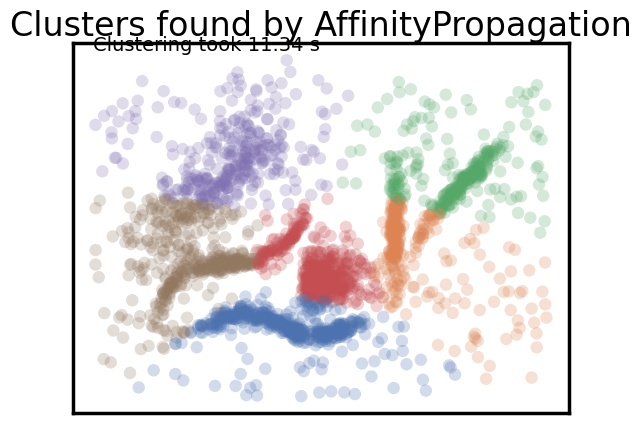

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.7 , 'damping':0.95})

# ***Mean Shift*** 

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(data, quantile=0.3, n_samples=100)

ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms.fit(data)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of Estimated Clusters : %d" % n_clusters_ )
print(bandwidth)
print(labels)

Number of Estimated Clusters : 1
0.2882625988985662
[0 0 0 ... 0 0 0]


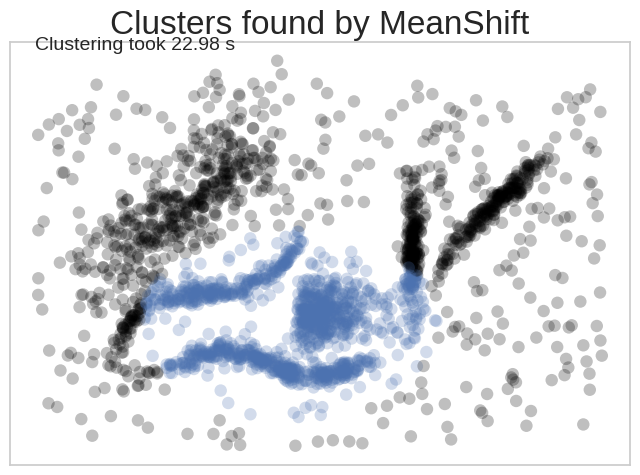

In [142]:
plot_clusters(data, cluster.MeanShift, (), {'bandwidth':0.2882625988985662, 'cluster_all':False,'bin_seeding':False}) 

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=200)

ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms.fit(data)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of Estimated Clusters : %d" % n_clusters_ )
print(bandwidth)
print(labels)

Number of Estimated Clusters : 3
0.22993086942757532
[0 0 0 ... 2 2 0]


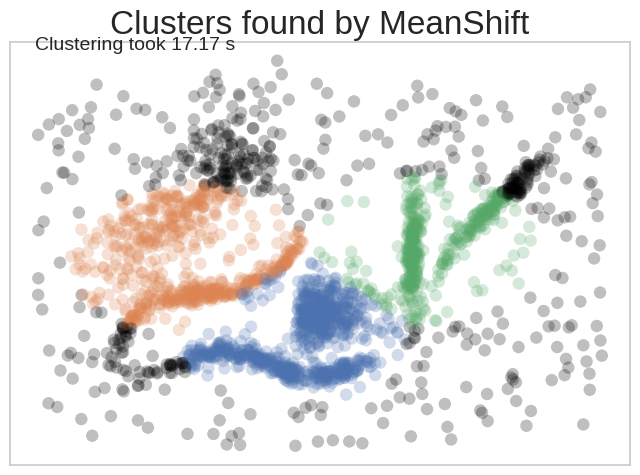

In [143]:
plot_clusters(data, cluster.MeanShift, (), {'bandwidth':0.22993086942757532, 'cluster_all':False,'bin_seeding':False}) 

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(data, quantile=0.15, n_samples=300)

ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms.fit(data)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of Estimated Clusters : %d" % n_clusters_ )
print(bandwidth)
print(labels)

Number of Estimated Clusters : 4
0.1946446016396089
[0 0 0 ... 0 2 0]


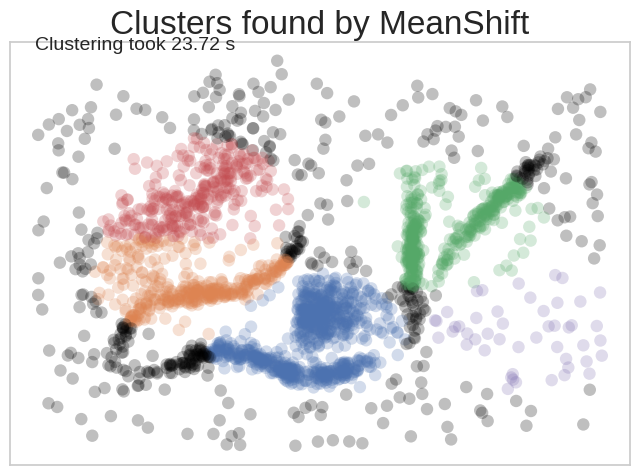

In [144]:
plot_clusters(data, cluster.MeanShift, (), {'bandwidth':0.1946446016396089, 'cluster_all':False,'bin_seeding':False}) 

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(data, quantile=0.1, n_samples=400)

ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms.fit(data)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of Estimated Clusters : %d" % n_clusters_ )
print(bandwidth)
print(labels)

Number of Estimated Clusters : 6
0.15387866396393338
[1 1 0 ... 4 2 0]


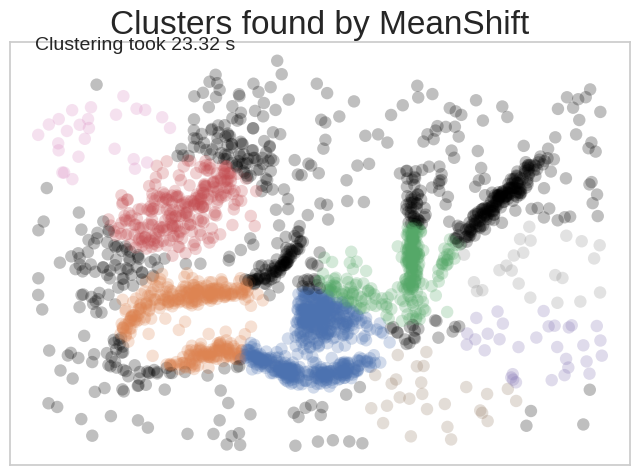

In [ ]:
plot_clusters(data, cluster.MeanShift, (), {'bandwidth':0.15387, 'cluster_all':False,'bin_seeding':False}) 

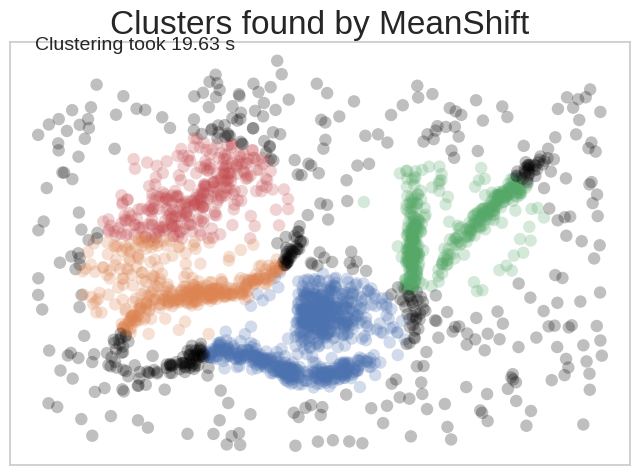

In [ ]:
plot_clusters(data, cluster.MeanShift, (), {'bandwidth':0.200, 'cluster_all':False,'bin_seeding':False}) 

# ***Spectral Clustering*** 

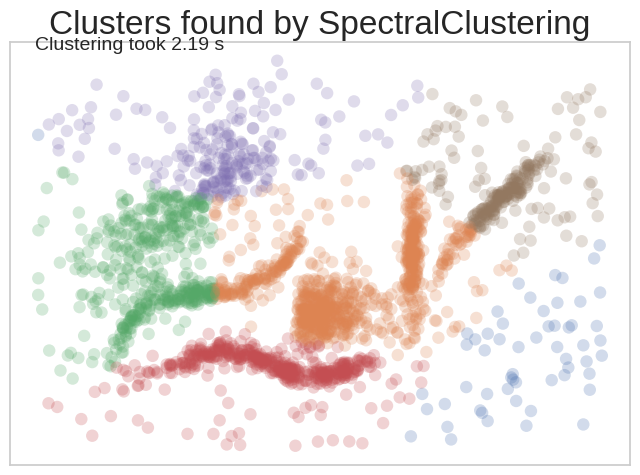

In [149]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6,'n_init':40, 'gamma':1.0, 'n_neighbors':70, 'eigen_tol':'auto'})

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 

Affinity matrix with Gaussian Kernel

"affinity" = "rbf"

In [ ]:
spectral_model_rbf = SpectralClustering(n_clusters = 6, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(data)

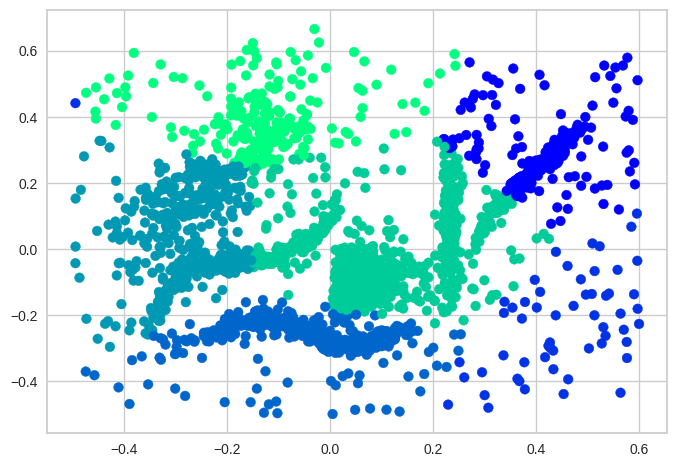

In [ ]:
plt.scatter(data.T[0], data.T[1],c = SpectralClustering(n_clusters = 6, affinity ='rbf') .fit_predict(data), cmap =plt.cm.winter) 
plt.show() 

Affinity matrix with Eucledean Distance

affinity = ‘nearest_neighbors’

In [ ]:
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 6, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(data)

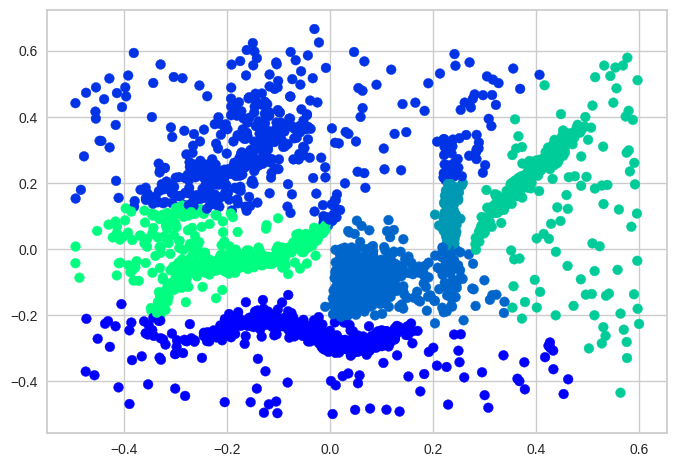

In [ ]:
# Visualizing the clustering 
plt.scatter(data.T[0], data.T[1],  
           c = SpectralClustering(n_clusters = 6, affinity ='nearest_neighbors') .fit_predict(data), cmap =plt.cm.winter) 
plt.show() 

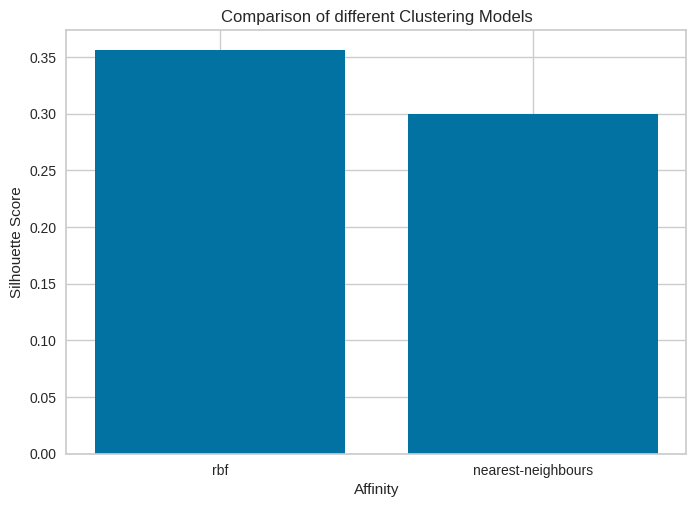

[0.35601795241548506, 0.29954797284282025]


In [ ]:
# List of different values of affinity 
affinity = ['rbf', 'nearest-neighbours'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(data, labels_rbf)) 
s_scores.append(silhouette_score(data, labels_nn)) 
  
# Plotting a Bar Graph to compare the models 
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

print(s_scores)

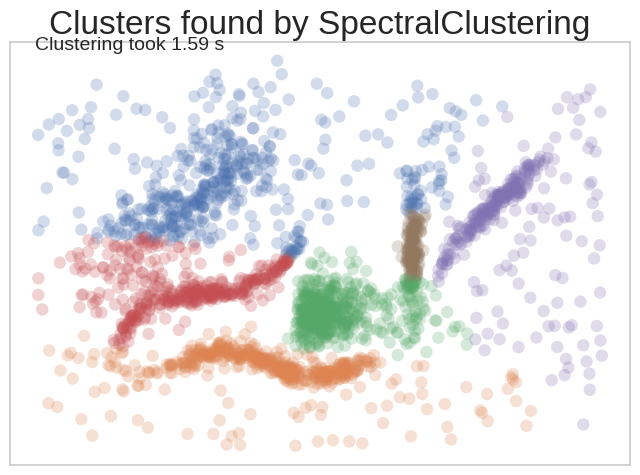

In [ ]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6,'affinity':'nearest_neighbors'})

In [ ]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6,'affinity':'rbf'})

In [ ]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

# ***Agglomerative Clustering*** 

In [151]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'affinity':'euclidean','compute_full_tree':'auto'}) 

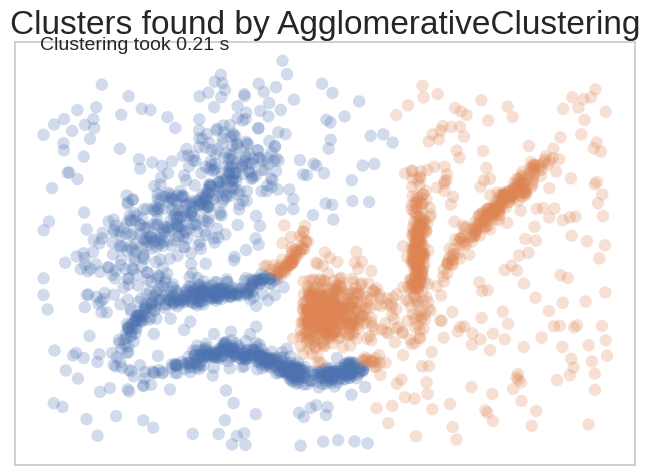

In [152]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'affinity':'deprecated', 'metric':None, 'memory':None}) 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster3 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster3.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 0, 3, 1])

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster3.labels_, cmap='rainbow')

In [ ]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'affinity':'euclidean','linkage':'ward'}) 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'}) 

# ***HDBSCAN*** 

In [ ]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 63.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541534 sha256=4bcab28aef3f1ed52f820d9b909c01a71f15bf3d0cf491a043c2fb46f0685753
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan


In [ ]:
import hdbscan

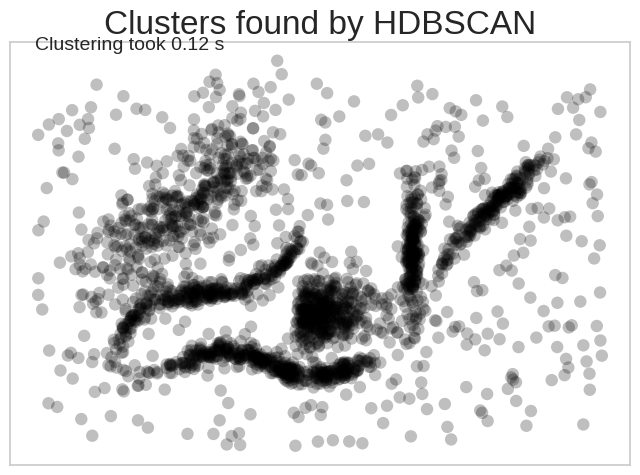

In [153]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':600,'min_samples':80})

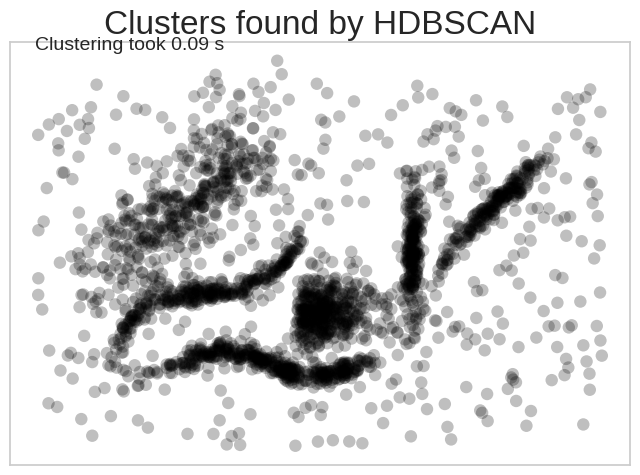

In [154]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':1900,'min_samples':120})

In [156]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':300,'min_samples':16})

In [ ]:
def funk(df, method, list_name):
    import warnings
    warnings.filterwarnings('ignore')  
    global data_leaf, data_eom
    n = df.shape[0]
    for gamma in range (1, int(np.log(n))):
        for ms in range(1, int(2 * np.log(n))):
            clust_alg = hdbscan.HDBSCAN(algorithm='best', alpha=1.0,
                                    approx_min_span_tree=True,
                                    gen_min_span_tree=True, 
                                    leaf_size=40,
                                    cluster_selection_method=method,
                                    metric='euclidean', 
                                    min_cluster_size=int(gamma * np.sqrt(n)), 
                                    min_samples=ms,
                                    allow_single_cluster=False).fit(df)
 
            min_cluster_size = clust_alg.min_cluster_size 
            min_samples = clust_alg.min_samples
            validity_score = clust_alg.relative_validity_
            # n_clusters = np.max(clust_alg.labels_)
            n_clusters = 6
            list_name.append((min_cluster_size, min_samples, validity_score, n_clusters))
            if validity_score >= .5:
                print (f'min_cluster_size = {min_cluster_size},  min_samples = {min_samples}, validity_score = {validity_score} n_clusters = {n_clusters}')

def best_validity(source):
    cols = ['min_cluster_size', 'min_samples', 'validity_score', 'n_clusters']
    df =  pd.DataFrame(source, columns = cols)
    best_validity = df.loc[df['validity_score'].idxmax()]
    return best_validity
data_leaf = []
data_eom = []

In [ ]:
funk(df = data, method = 'leaf', list_name = data_leaf)
best_leaf = best_validity(data_leaf)
best_leaf

min_cluster_size    48.000000
min_samples         10.000000
validity_score       0.344234
n_clusters           6.000000
Name: 9, dtype: float64

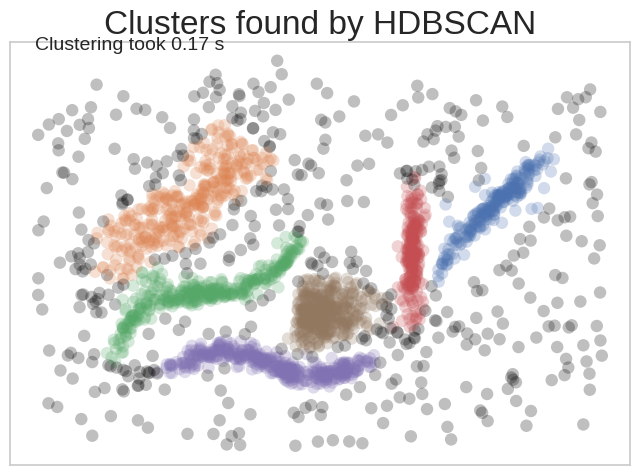

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':48,'min_samples':10})

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':48})

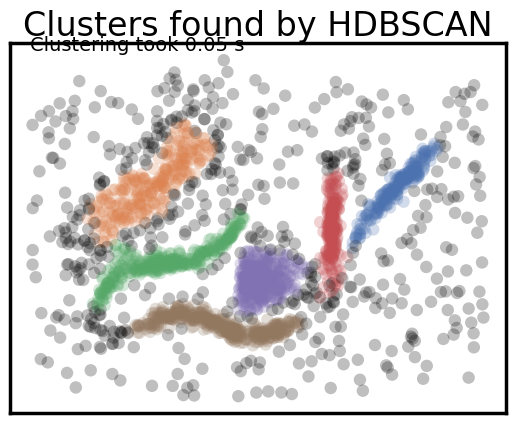

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})